## 1. Problem to solve:

## We need to predict if this customer will make purchase or not based on the online search history
## Project objectives include:
## (1) EDA of dataset to identify business insights
## (2) Feature engineering
## (3) Building classfication models and comparing model performance
## (4) Wrapping and deploying the best model to pkl file for deployment.

## Future work is to build an app that allows input of a large dataset of many customers' information and returns the customers whose purchase probability is higher than a set value. This will help to priorize customer retention work. Due to time constrain, this part of work is not included in the current project objectives.

## 2. EDA

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, plot_roc_curve

import warnings 
warnings.filterwarnings('ignore')

### 2.1 Data overview

In [2]:
#Load the data
df = pd.read_csv('coding_round_data.csv')

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
df.info()
# this dataset has 18 features and 12,330 rows 10 of the features are numerical and 8 are categorical
# Revenue is the label, indicating if a customer purchase the product or not.
# this dataset seems to have no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
#check missing values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
#There is no missing values for this dataset


#### 2.1.1 Check The Label

<AxesSubplot:ylabel='Revenue'>

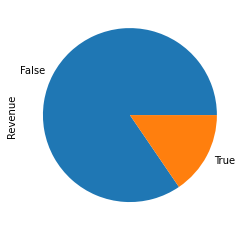

In [7]:
# Check the Revenue
df.Revenue.value_counts().plot(kind='pie')

In [8]:
(df.Revenue==True).sum() / len(df)

# there are only 15.47% customers who purchased the product. Imbalanced dataset

0.15474452554744525

<AxesSubplot:ylabel='Weekend'>

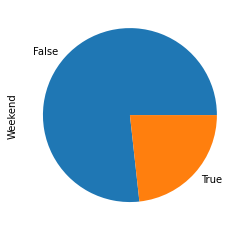

In [9]:
### Check Weekend or not

df.Weekend.value_counts().plot(kind='pie')

In [10]:
(df.Weekend==True).sum() / len(df)

# there are only 23.26% customers who purchased the product. Imbalanced dataset

0.23260340632603407

#### 2.1.2 Encoding the bool features: 'Weekend' and 'Revenue'

In [11]:
#encoding Weekend  and Revenue True = 1 False = 0
df['Weekend']=df['Weekend'].astype(np.int)
df['Revenue']=df['Revenue'].astype(np.int)
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor        0        0  
1        2       1            2  Returning_Visitor        0        0  
2        1       9            3  Returning_Visitor        0        0  
3        2       2            4  Returning_Visitor        0        0  
4        3       1            4  Returning_Visitor        1        0

### 2.2 Check Categorical Features

In [12]:
# This function is to count the purchase or not purchase action with respect to each categorical features.
# This function also show the bar plot of purchase percentage with respect to each categorical features.
def checkcategorical(categorical_feature):
    df_1 = pd.crosstab(df[categorical_feature],df['Revenue'])
    number = df_1.div(df_1.sum(1).astype(float),axis=0)[1]
    print(number)
    df_1.div(df_1.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 3), tick_label =1, color = ['green', 'yellow'])
    plt.title(categorical_feature+ ' vs Revenue Rate', fontsize = 15)
    plt.legend(loc='upper right', title='Revenue')
    
    plt.show()


In [13]:
# Weekend vs Revenue counts
df['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

Weekend
0    0.148911
1    0.173989
Name: 1, dtype: float64


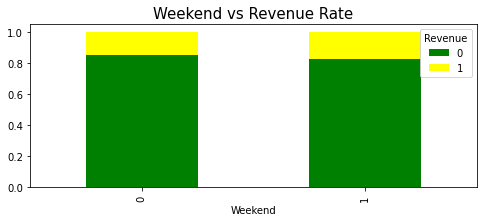

In [14]:
checkcategorical('Weekend')

***14.89% Website visitors purchased during none weekend and 17.40% website visitors urchased during weekend.***

In [15]:
#Visitortype vs Revenue counts
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

VisitorType
New_Visitor          0.249115
Other                0.188235
Returning_Visitor    0.139323
Name: 1, dtype: float64


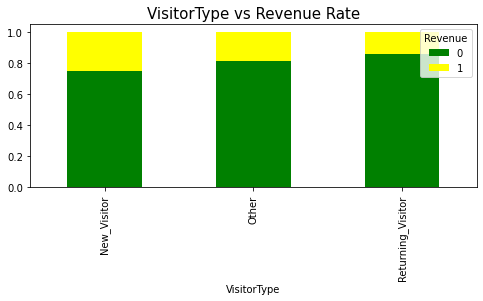

In [16]:
checkcategorical('VisitorType')

***Insights: New visitors have higher purchase rate than returning visitors, need to figure out why they are not returning***

In [17]:
# TrafficType vs Revenue counts
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

TrafficType
1     0.106895
2     0.216458
3     0.087719
4     0.154350
5     0.215385
6     0.119369
7     0.300000
8     0.276968
9     0.095238
10    0.200000
11    0.190283
12    0.000000
13    0.058266
14    0.153846
15    0.000000
16    0.333333
17    0.000000
18    0.000000
19    0.058824
20    0.252525
Name: 1, dtype: float64


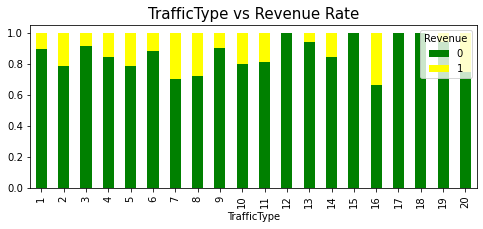

In [18]:
checkcategorical('TrafficType')

***Insights: Majority of the visitors coming from 1,2,3,4 some channels such as 12,17 have only 1 visitor for almost a year. For channel 15 and channel 18, no one made any purchases throught out the year. Might consider drop those channels***

***For channel 9,7,19,14,16 only small amount of the customers coming through those channels might consider drop those as well***

In [19]:
#Region vs Revenue counts
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Region
1    0.161297
2    0.165493
3    0.145235
4    0.148054
5    0.163522
6    0.139130
7    0.156373
8    0.129032
9    0.168297
Name: 1, dtype: float64


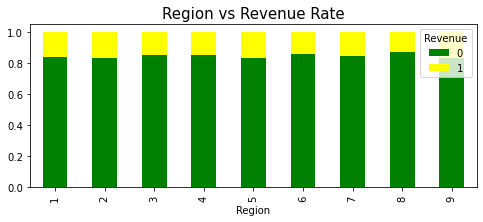

In [20]:
checkcategorical('Region')

In [21]:
# The revenue rate is similiar for all regions.
# Regions might not be the key features to influence the purchase

In [22]:
# Browser vs Revenue counts
df['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Browser
1     0.148253
2     0.153624
3     0.047619
4     0.176630
5     0.184154
6     0.114943
7     0.122449
8     0.155556
9     0.000000
10    0.196319
11    0.166667
12    0.300000
13    0.262295
Name: 1, dtype: float64


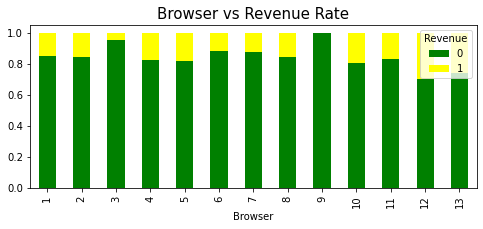

In [23]:
checkcategorical('Browser')

***Insights：Browser13，7，12，11，9 bring least amount of visitors. If the company spend money on those browsers, it is probably not worth the price.***

In [24]:
# OperatingSystems vs Revenue counts
df['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

OperatingSystems
1    0.146615
2    0.174973
3    0.104892
4    0.177824
5    0.166667
6    0.105263
7    0.142857
8    0.215190
Name: 1, dtype: float64


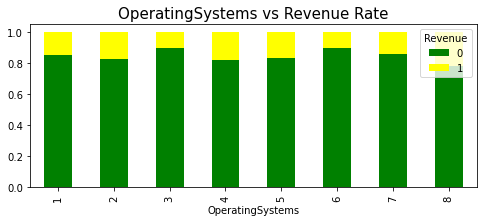

In [25]:
checkcategorical('OperatingSystems')

***Operating system 5,6,7,8 only have a few customers, if business parterner is spending money on those systems, they might consider stop that.***

In [26]:
#Month vs Revenue counts
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Month
Aug     0.175520
Dec     0.125072
Feb     0.016304
Jul     0.152778
June    0.100694
Mar     0.100682
May     0.108502
Nov     0.253502
Oct     0.209472
Sep     0.191964
Name: 1, dtype: float64


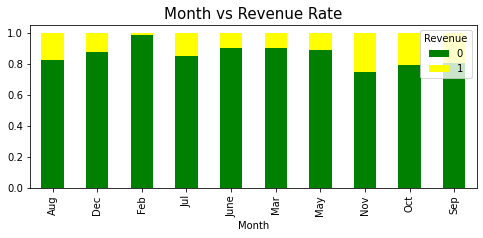

In [27]:
checkcategorical('Month')

***Only 184 people visited website on Feburary, maybe people still recovering from the holiday purchases. There are more visitors in May, November, March and December. Business might consider promoting the prduct during those months. There are no data on January adn April, Why is that???***


In [28]:
#SpecialDay vs Revenue counts
df['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

SpecialDay
0.0    0.165268
0.2    0.078652
0.4    0.053498
0.6    0.082621
0.8    0.033846
1.0    0.064935
Name: 1, dtype: float64


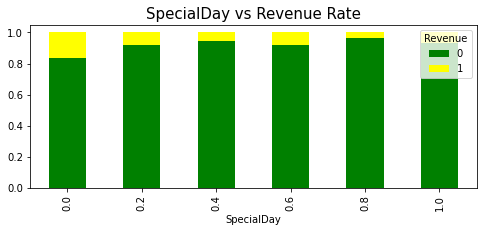

In [29]:
checkcategorical('SpecialDay')

***When it is close to a special day, people intended to visit the website and make purchases***

### 2.3 Numerical features

#### 2.3.1 Overview on numerical features

In [30]:
#columns for numerical features
df_num = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues','Revenue']]

In [31]:
df_num.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues       Revenue  
count  12330.000000  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258      0.154745  
std        0.048488      0.048597     18.568437      0.361676  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003112      0.025156      0.000000      0.000000  
75%        0.016813      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

In [32]:
num_features = df_num.columns

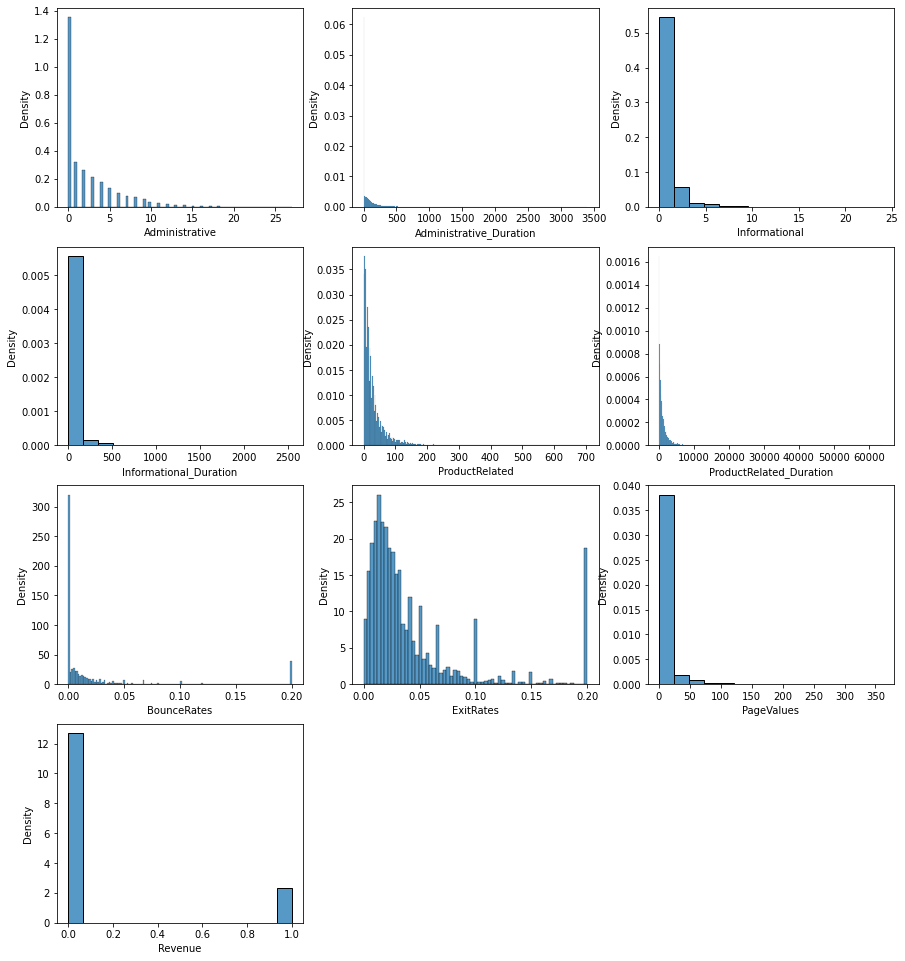

In [33]:
plt.figure(figsize=(15, 30))
for i in range(len(num_features)):
    plt.subplot(7, 3,i+1)
    sns.histplot(data=df, x=num_features[i], stat = "density",  kde=False)

In [34]:
# All of the numerical data are right skewed... 

#### 2.3.2 Check for Outlier

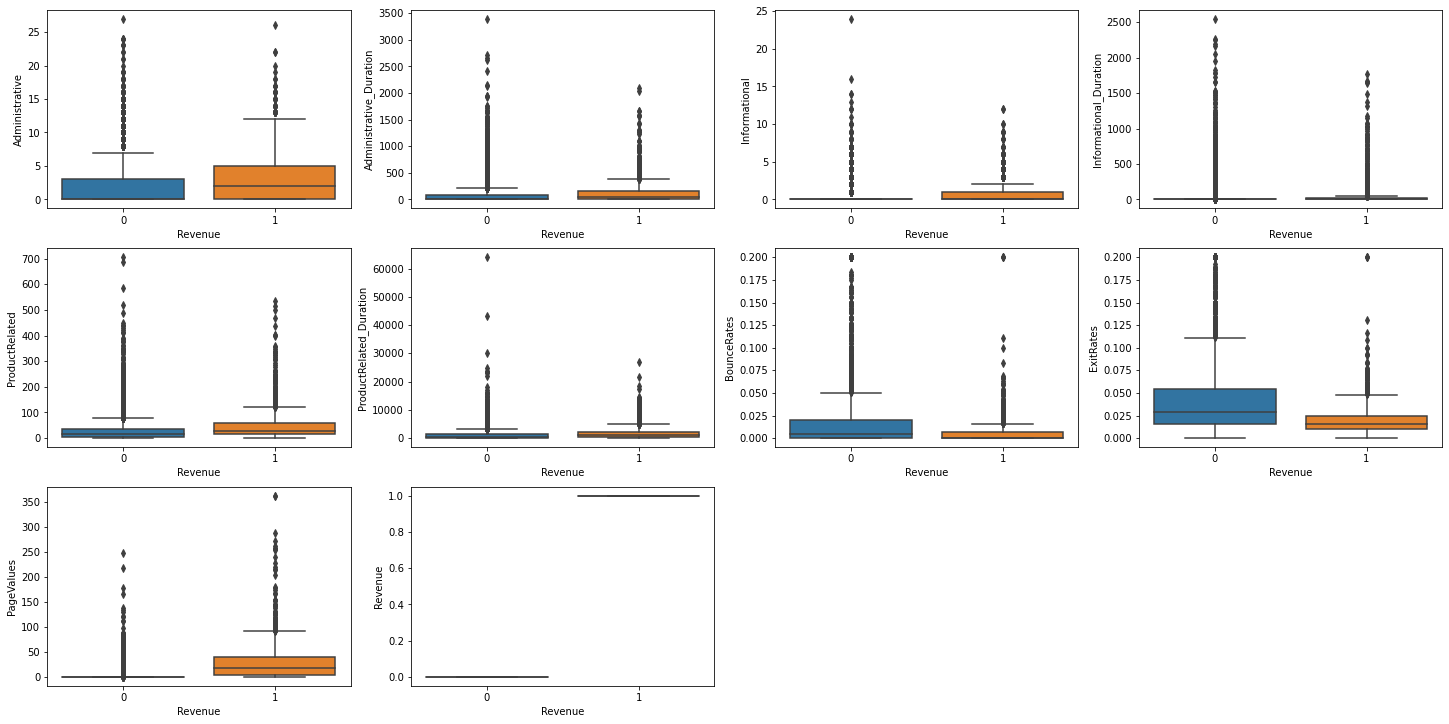

In [35]:
# Checking for outliers
plt.figure(figsize=(25, 30))
for i in range(len(num_features)):
    plt.subplot(7, 4, i+1)
    sns.boxplot(x='Revenue', y=num_features[i], data=df_num)

***all of the numerical features have decent amount of outliers. Need to deal with this in feature engineering part.***

***We notice ExitRates, ProductRelated, PageValues have wide data distribution difference. We want to make an assumption that those features play important roles classification prediction result.***

#### 2.3.3 Relationship of "Administrative" and Revenue

(0.0, 1000.0)

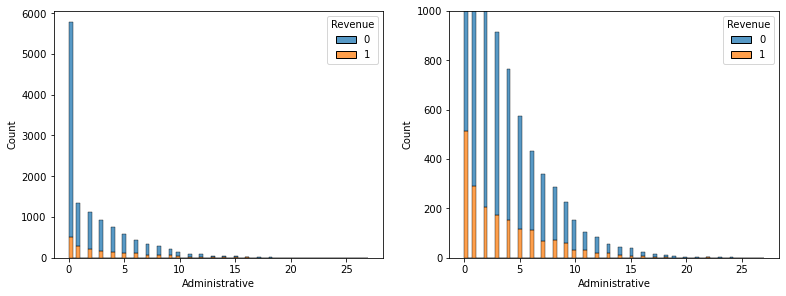

In [36]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='Administrative', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='Administrative', hue='Revenue', multiple='stack') #Zoom in at y = (0-1000)
plt.ylim(0,1000)

#### 2.3.4 Relationship of "Administrative_Duration" and Revenue

(0.0, 100.0)

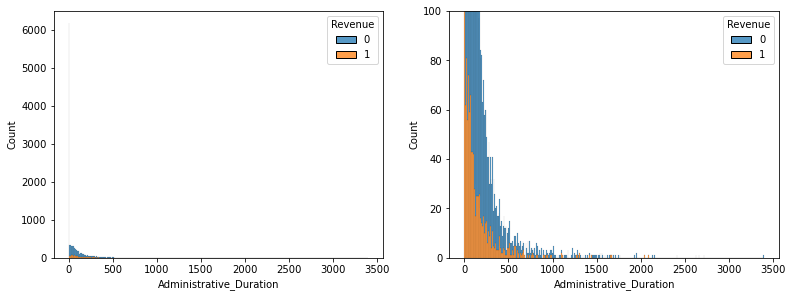

In [37]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='Administrative_Duration', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='Administrative_Duration', hue='Revenue', multiple='stack') #Zoom in at y = (0-100)
plt.ylim(0,100)

#### 2.3.5 Relationship of "Informational" and Revenue

(0.0, 2000.0)

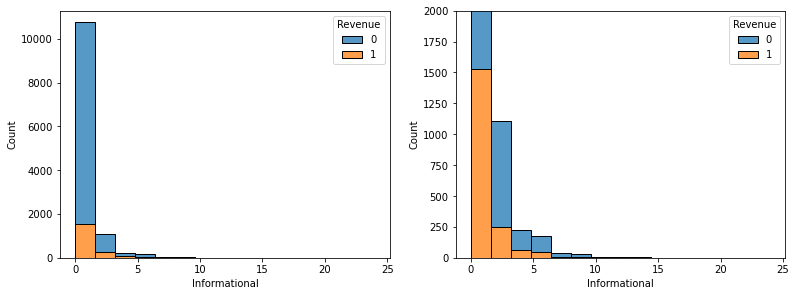

In [38]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='Informational', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='Informational', hue='Revenue', multiple='stack') #Zoom in at y = (0-2000)
plt.ylim(0,2000)

#### 2.3.6 Relationship of "Informational_Duration" and Revenue

(0.0, 2000.0)

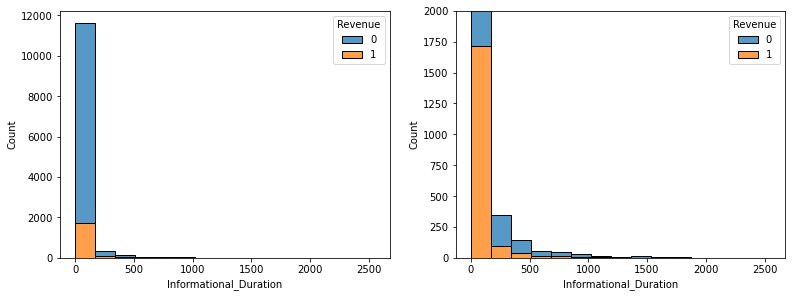

In [39]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='Informational_Duration', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='Informational_Duration', hue='Revenue', multiple='stack') #Zoom in at y = (0-2000)
plt.ylim(0,2000)

#### 2.3.7 Relationship of "ProductRelated" and Revenue

(0.0, 200.0)

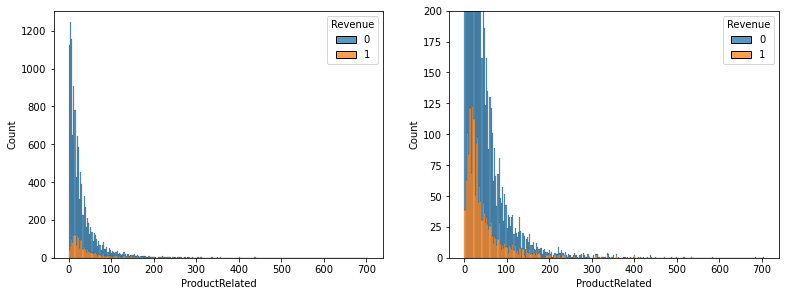

In [40]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='ProductRelated', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='ProductRelated', hue='Revenue', multiple='stack')#Zoom in at y = (0-200)
plt.ylim(0,200)

#### 2.3.8 Relationship of "ProductRelated_Duration" and Revenue

(0.0, 125.0)

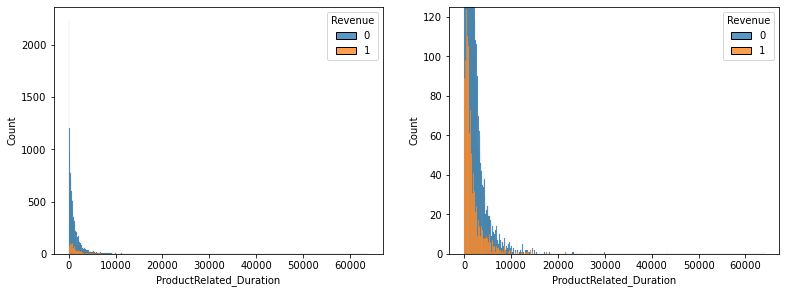

In [41]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='ProductRelated_Duration', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='ProductRelated_Duration', hue='Revenue', multiple='stack')#Zoom in at y = (0-125)
plt.ylim(0,125)

#### 2.3.9 Relationship of "BounceRate" and Revenue

(0.0, 1500.0)

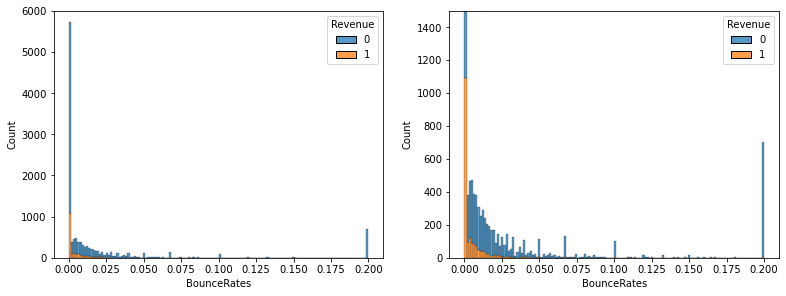

In [42]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='BounceRates', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='BounceRates', hue='Revenue', multiple='stack')#Zoom in at y = (0-1500)
plt.ylim(0,1500)

***Bounce rate shows bypolar tendency for no purchasing customers. Assumptions: Higher the bouncerates, the lower the purchase rate.***

#### 2.3.10 Relationship of "ExitRate" and Revenue

(0.0, 250.0)

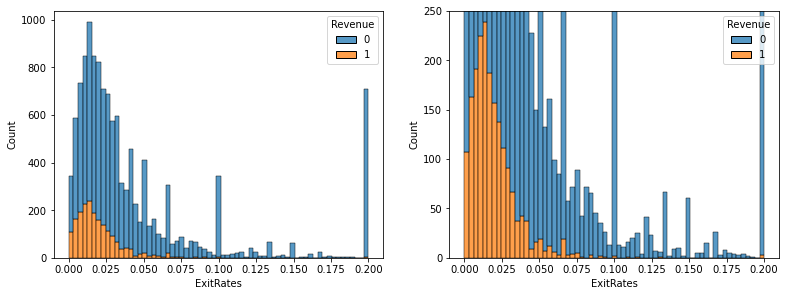

In [43]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='ExitRates', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='ExitRates', hue='Revenue', multiple='stack')#Zoom in at y = (0-250)
plt.ylim(0,250)

***Assumption: The higher the exit rate, the less chance customer make a purchase***

#### 2.3.11 Relationship of "PageValues" and Revenue

(0.0, 2000.0)

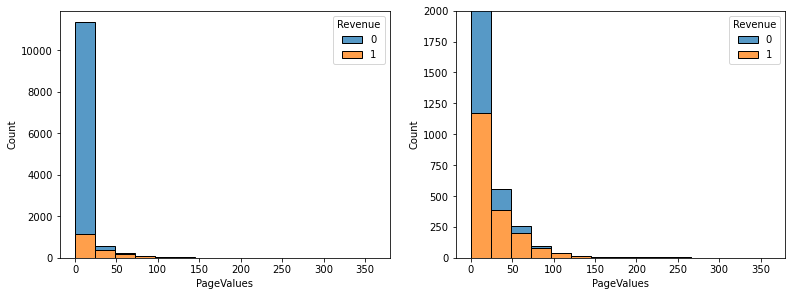

In [44]:
plt.rcParams['figure.figsize'] = (13, 10)
plt.subplot(2, 2, 1)
sns.histplot(data=df_num, x='PageValues', hue='Revenue', multiple='stack')
plt.subplot(2, 2, 2)
sns.histplot(data=df_num, x='PageValues', hue='Revenue', multiple='stack')#Zoom in at y = (0-2000)
plt.ylim(0,2000)

***Page value equation is (e_commerce_revenue+total_goal_value)/number_of_unique_page_view_for_given_pages.***

***The assumptions are: the higher the pageview, the more likely this customer will make a purchase. This is because this customer has spent a lot of time on the web pages. When I spend more time checking in on a product, the more likely I will make a purchase***

### 2.4 Other relationships

Text(0.5, 1.0, 'Visitors vs ExitRates wrt Revenue')

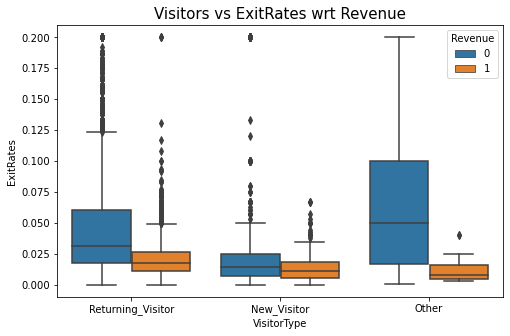

In [45]:
#Visitors vs Exit Rates with respect to Revenue
plt.rcParams['figure.figsize'] = (8,5)
sns.boxplot(x = df['VisitorType'], y = df['ExitRates'], hue = df['Revenue'])
plt.title('Visitors vs ExitRates wrt Revenue', fontsize = 15)

***Generally, for returning customer, non purchasing customer has higher exit rates.***

***There are less than 100 "other" dataset. It is not representible at this situation*** 

Text(0.5, 1.0, 'SpecialDay vs ExitRates wrt Revenue')

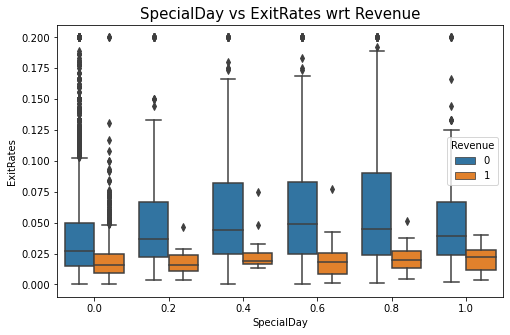

In [46]:
plt.rcParams['figure.figsize'] = (8,5)
sns.boxplot(x = df['SpecialDay'], y = df['ExitRates'], hue = df['Revenue'])
plt.title('SpecialDay vs ExitRates wrt Revenue', fontsize = 15)

***Noticed that when it is close to special day, the exit rate of none purchasing customer is the lowest. People might just wanna take a look at the product in the beginning and purchase when holiday comes.***

## 3. Feature engineering

#### 3.1 Encoding month and VisitorType

In [47]:
# will do ordinal encode for "month" and one hot encode for "VisitorType"
def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df=df.copy()
    dummies = pd.get_dummies(df[column], prefix = prefix)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1)
    return df

In [48]:
month_ordering = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
visitor_prefix = ['Returning_Visitor','New_Visitor','Other']

In [49]:
df = ordinal_encode(df, 'Month', month_ordering)

In [50]:
df = onehot_encode(df, 'VisitorType', visitor_prefix)

In [51]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      1                 1   
1         0.00       0.10         0.0         0.0      1                 2   
2         0.20       0.20         0.0         0.0      1                 4   
3         0.05       0.14         0.0         0.0      1                 3   
4         0.02       0.05         0.0         0.0      1                 3   

   Browser  Region  TrafficType  Weekend  Revenue  \
0        1       1            1        0        0   
1        2       1            2        0        0   
2        1       9            3        0        0   
3        2       2            4        0        0   
4        3       1            4        1        0   

   ['Returning_Visitor', 'New_Visitor', 'Other']_New_Visitor  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   ['Returning_Visitor', 'New_Visitor', 'Other']_Other  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   ['Returning_Visitor', 'New_Visitor', 'Other']_Returning_Visitor  
0                                                  1                
1                                                  1                
2                                                  1                
3                                                  1                
4                                                  1

### 3.2 Train Test Split

In [52]:
# Feature Matrix
features = list(df.columns)
features.remove('Revenue')
X = df[features]
y = df.Revenue

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

### 3.2 pairplot

In [54]:
# Get the numerical data in the training set
X_train_num = X_train[['Administrative', 'Administrative_Duration', 'Informational',
                                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                                   'BounceRates', 'ExitRates', 'PageValues']]

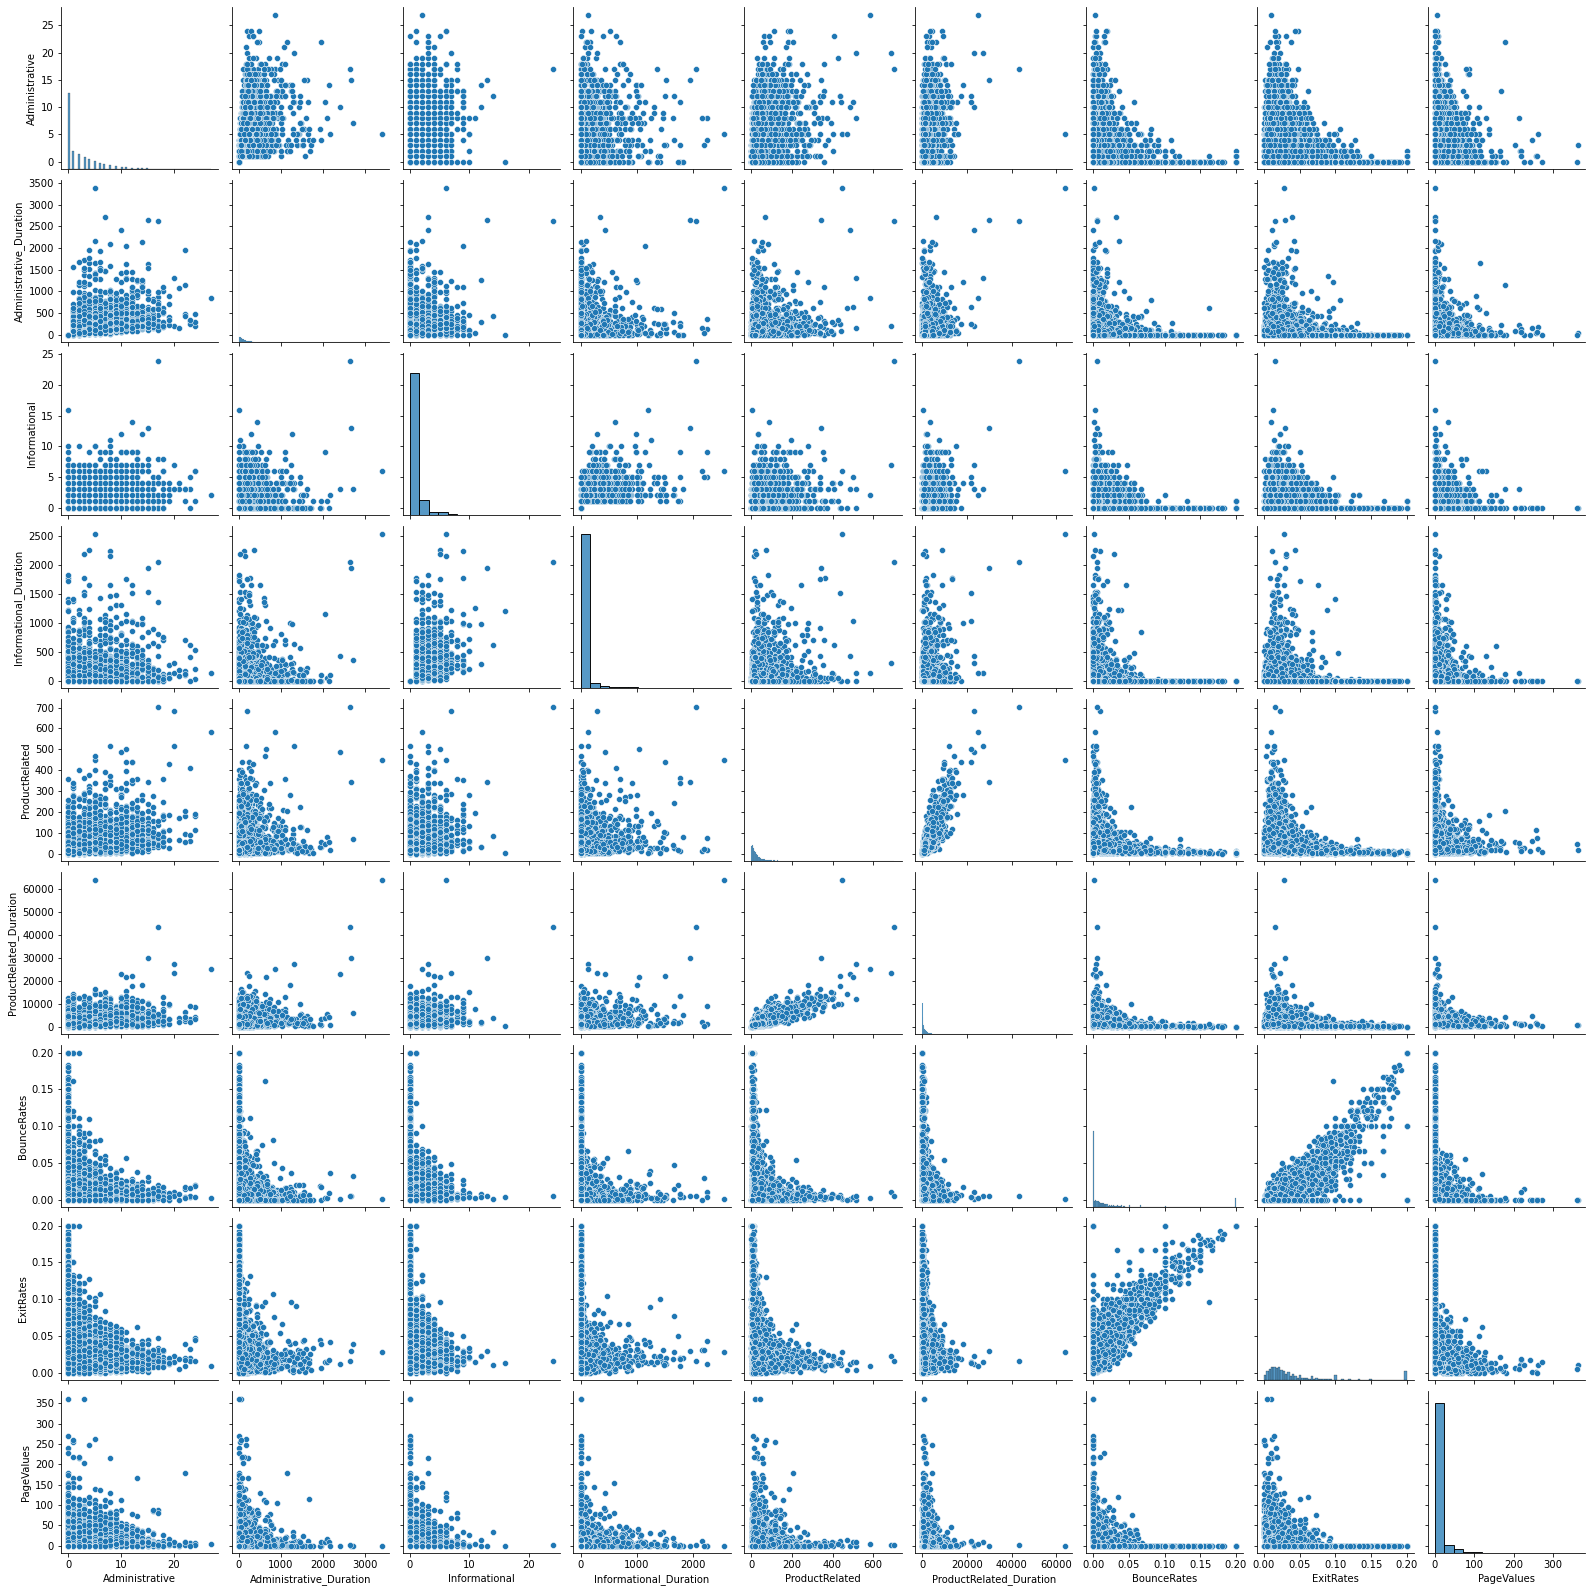

In [55]:
sns.pairplot(data=X_train_num)

In [56]:
#get correlation coefficient for all the numerical data
X_train_num.corr()

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.590877   
Administrative_Duration        0.590877                 1.000000   
Informational                  0.387546                 0.310295   
Informational_Duration         0.262781                 0.249075   
ProductRelated                 0.437912                 0.296112   
ProductRelated_Duration        0.379310                 0.369037   
BounceRates                   -0.223775                -0.142822   
ExitRates                     -0.317155                -0.205059   
PageValues                     0.100366                 0.067116   

                         Informational  Informational_Duration  \
Administrative                0.387546                0.262781   
Administrative_Duration       0.310295                0.249075   
Informational                 1.000000                0.616250   
Informational_Duration        0.616250                1.000000   
ProductRelated                0.371636                0.289141   
ProductRelated_Duration       0.383987                0.365983   
BounceRates                  -0.116266               -0.073660   
ExitRates                    -0.164493               -0.103883   
PageValues                    0.052761                0.035144   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.437912                 0.379310    -0.223775   
Administrative_Duration        0.296112                 0.369037    -0.142822   
Informational                  0.371636                 0.383987    -0.116266   
Informational_Duration         0.289141                 0.365983    -0.073660   
ProductRelated                 1.000000                 0.857413    -0.203842   
ProductRelated_Duration        0.857413                 1.000000    -0.182844   
BounceRates                   -0.203842                -0.182844     1.000000   
ExitRates                     -0.292107                -0.250033     0.911148   
PageValues                     0.056672                 0.050209    -0.119979   

                         ExitRates  PageValues  
Administrative           -0.317155    0.100366  
Administrative_Duration  -0.205059    0.067116  
Informational            -0.164493    0.052761  
Informational_Duration   -0.103883    0.035144  
ProductRelated           -0.292107    0.056672  
ProductRelated_Duration  -0.250033    0.050209  
BounceRates               0.911148   -0.119979  
ExitRates                 1.000000   -0.177063  
PageValues               -0.177063    1.000000

<AxesSubplot:>

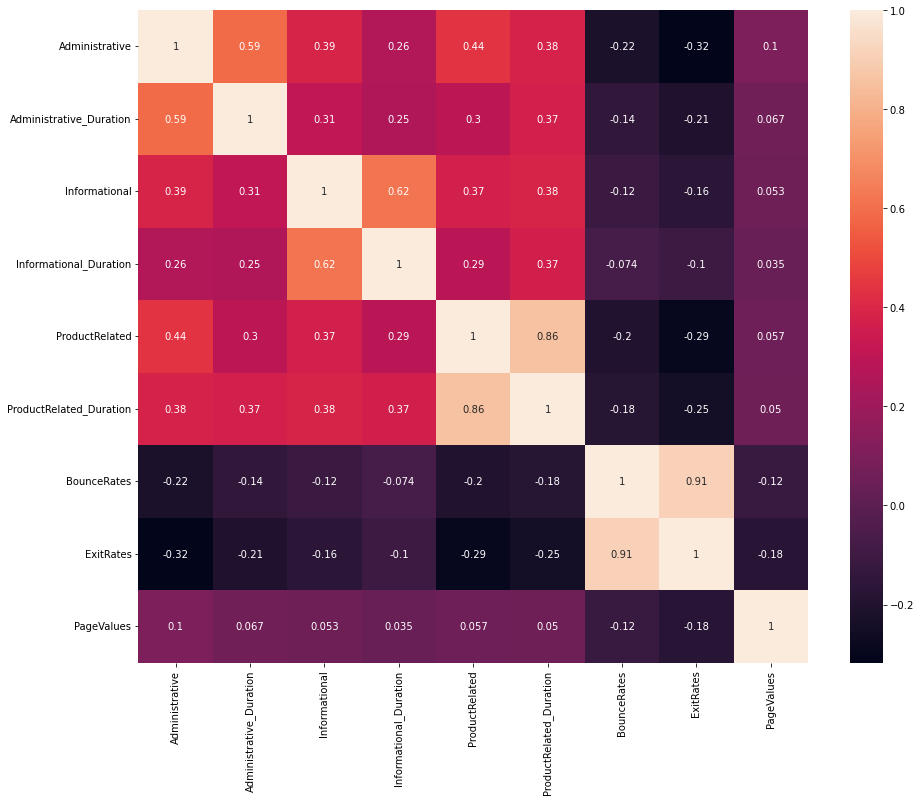

In [57]:
#get heat map for the correlation coefficient.
plt.figure(figsize=(15,12))
sns.heatmap(X_train_num.corr(), annot=True)

<AxesSubplot:>

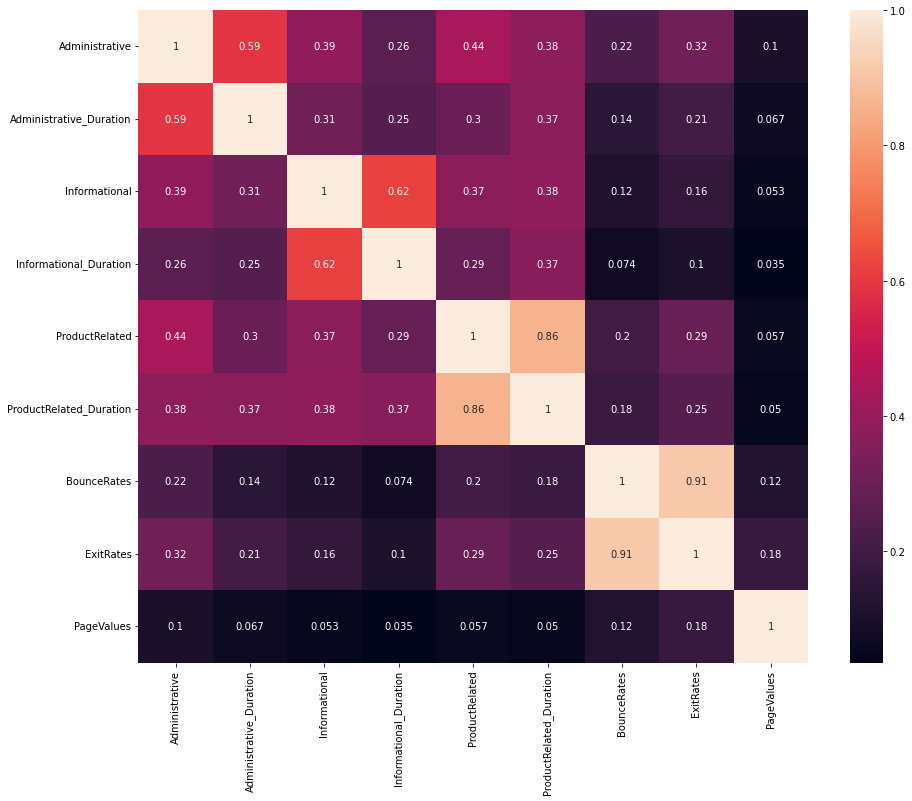

In [58]:
#get the absolute value for heat maps
plt.figure(figsize=(15,12))
sns.heatmap(np.absolute(X_train_num.corr()), annot=True)

***Exit Rate is highly correlated to Bounce Rate, Correlation coefficient = 0.91. Product Related is highly correlated to product_related duration, correlation coefficient is 0.86. Both coefficient is larger than 0.8.***


In [59]:
# Select the highly correlated features with this function
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: # We are interested in absolute coeff value
                colname = corr_matrix.columns[i] #get the name of column
                col_corr.add(colname)
    return col_corr
            

In [60]:
corr_features = correlation(X_train_num,0.7)
corr_features

{'ExitRates', 'ProductRelated_Duration'}

In [61]:
# Drop Product_related_duration 
X_train = X_train.drop(['ProductRelated_Duration'],axis = 1)


In [62]:
# drop ExitRates
X_train = X_train.drop(['ExitRates'],axis = 1)

## 4. Purchase Action Modeling

In [63]:
#drop productrelatied duration from Xtest
X_test = X_test.drop(['ProductRelated_Duration'],axis = 1)

In [64]:
#Drop ExitRates for test datasets
X_test = X_test.drop(['ExitRates'],axis = 1)

### 4.1 Logistic regression, balanced class weight, scoring='roc_auc'

In [65]:
logis_params = {'logis__penalty':['l1','l2','elasticnet'],
                'logis__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag' 'aga'],
                'logis__C': np.logspace(0,20,20),
                'logis__l1_ratio':[0.1,0.3,0.5,0.7,0.9]}

steps = [('scaler', StandardScaler()),
        ('logis', LogisticRegression(random_state=56, class_weight='balanced'))]

logis_pipe = Pipeline(steps)

logis_grid = GridSearchCV(estimator=logis_pipe, param_grid=logis_params, scoring='roc_auc', cv=5, n_jobs=-1)

logis_grid.fit(X_train, y_train)

/Users/xiuqifang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/xiuqifang/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/xiuqifang/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/xiuqifang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/xiuqifang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' pe

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logis',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=56))]),
             n_jobs=-1,
             param_grid={'logis__C': array([1.00000000e+00, 1.12883789e+01, 1.27427499e+02, 1.43844989e+03,
       1.62377674e+04, 1.83298071e+05, 2.06913808e+06, 2.33572147e+07,
       2.63665090e+08, 2.97635144e+09, 3.35981829e+10, 3.79269019e+11,
       4.28133240e+12, 4.83293024e+13, 5.45559478e+14, 6.15848211e+15,
       6.95192796e+16, 7.84759970e+17, 8.85866790e+18, 1.00000000e+20]),
                         'logis__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
                         'logis__penalty': ['l1', 'l2', 'elasticnet'],
                         'logis__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                           'sagaga']},
      

In [66]:
logis_grid.best_params_

{'logis__C': 1.0,
 'logis__l1_ratio': 0.1,
 'logis__penalty': 'l1',
 'logis__solver': 'liblinear'}

In [67]:
logis_train_pred = logis_grid.predict(X_train)
logis_test_pred = logis_grid.predict(X_test)

In [68]:
print('Logistic Regression, Train set:\n')
print(classification_report(y_train, logis_train_pred))

Logistic Regression, Train set:

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8308
           1       0.56      0.73      0.64      1556

    accuracy                           0.87      9864
   macro avg       0.75      0.81      0.78      9864
weighted avg       0.89      0.87      0.87      9864



Logistic Regression, Train set:



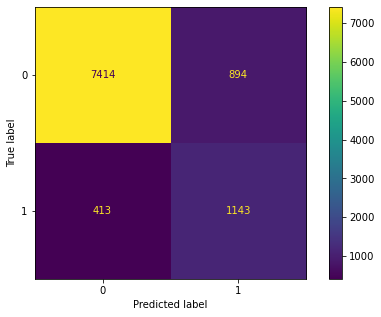

In [69]:
print('Logistic Regression, Train set:\n')
plot_confusion_matrix(logis_grid, X_train, y_train)

Logistic Regression, Train set:



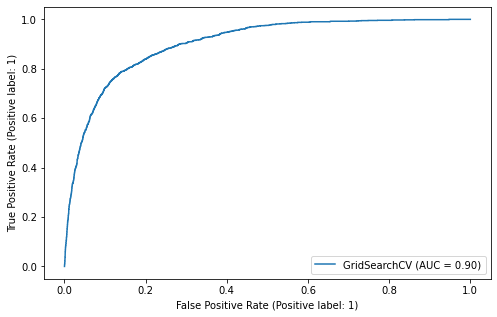

In [70]:
print('Logistic Regression, Train set:\n')
plot_roc_curve(logis_grid, X_train, y_train)

In [71]:
print('Logistic Regression, Test set:\n')
print(classification_report(y_test, logis_test_pred))

Logistic Regression, Test set:

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2114
           1       0.54      0.73      0.62       352

    accuracy                           0.87      2466
   macro avg       0.75      0.81      0.77      2466
weighted avg       0.89      0.87      0.88      2466



Logistic Regression, Test set:



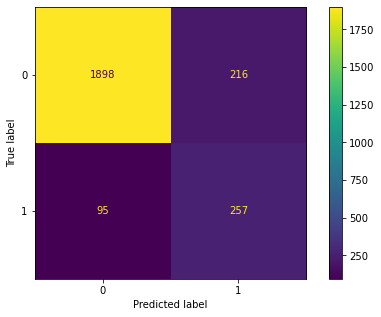

In [72]:
print('Logistic Regression, Test set:\n')
plot_confusion_matrix(logis_grid, X_test, y_test)

Logistic Regression, Test set:



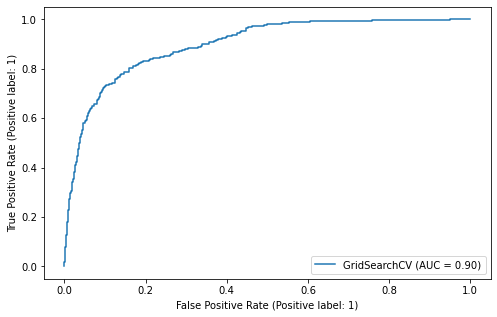

In [73]:
print('Logistic Regression, Test set:\n')
plot_roc_curve(logis_grid, X_test, y_test)

In [74]:
y_train_proba = logis_grid.predict_proba(X_train)
y_test_proba = logis_grid.predict_proba(X_test)

In [75]:
print('Logistic Regression, Train set roc_auc:', roc_auc_score(y_train,y_train_proba[:,1]))
print('Logistic Regression, Test set roc_auc:', roc_auc_score(y_test,y_test_proba[:,1]))

Logistic Regression, Train set roc_auc: 0.9018480963620409
Logistic Regression, Test set roc_auc: 0.8977877461942031


### Summary for Logistic Regression

***train and test sets have consistent results***

***recall is not bad, but precision for class 1 is poor***

### 4.2 Random Forest Classifier, balanced class weight, scoring='roc_auc'

In [76]:
# I also checked other class_weight combination, no better than 'balanced'
# grid search cv to get fine tuned hyperparameters
rf_param_grid = {'criterion': ['gini','entropy'],
             'n_estimators': [150,175,200],
             'max_features': ['auto'],
             'max_depth': [21,22,23],
             'min_samples_split': [3,4,5],
             'min_samples_leaf':[6,8]}

rf_grid_search = RandomForestClassifier(random_state=56, class_weight='balanced')

rf_grid_search_train = GridSearchCV(estimator=rf_grid_search, param_grid=rf_param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

rf_grid_search_train.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=56),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [21, 22, 23], 'max_features': ['auto'],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [150, 175, 200]},
             scoring='roc_auc')

In [77]:
rf_grid_search_train.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 150}

In [78]:
rf_grid_search_train.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=21, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=150, random_state=56)

In [79]:
rf_train_pred = rf_grid_search_train.predict(X_train)
rf_test_pred = rf_grid_search_train.predict(X_test)

In [80]:
print('Random Forest, Train set:\n')
print(classification_report(y_train, rf_train_pred))

Random Forest, Train set:

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8308
           1       0.69      0.92      0.79      1556

    accuracy                           0.92      9864
   macro avg       0.83      0.92      0.87      9864
weighted avg       0.94      0.92      0.93      9864



Random Forest, Train set:



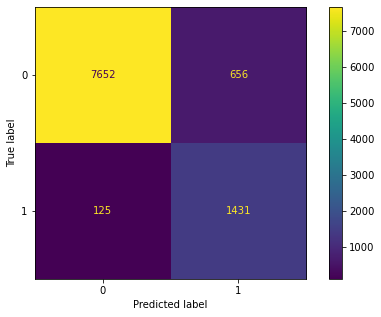

In [81]:
print('Random Forest, Train set:\n')
plot_confusion_matrix(rf_grid_search_train, X_train, y_train)

Random Forest, Train set:



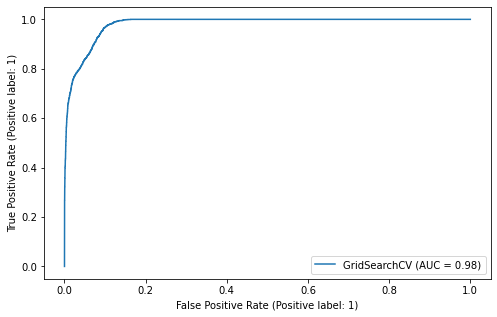

In [82]:
print('Random Forest, Train set:\n')
plot_roc_curve(rf_grid_search_train, X_train, y_train)

In [83]:
print('Random Forest, Test set:\n')
print(classification_report(y_test, rf_test_pred))

Random Forest, Test set:

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2114
           1       0.58      0.77      0.66       352

    accuracy                           0.89      2466
   macro avg       0.77      0.84      0.80      2466
weighted avg       0.90      0.89      0.89      2466



Random Forest, Test set:



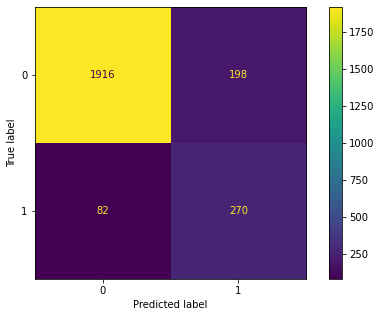

In [84]:
print('Random Forest, Test set:\n')
plot_confusion_matrix(rf_grid_search_train, X_test, y_test)

# better results than logistic regression!

Random Forest, Test set:



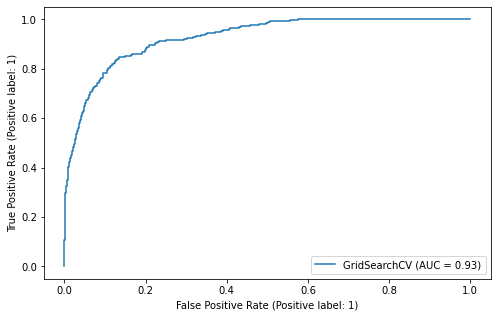

In [85]:
print('Random Forest, Test set:\n')
plot_roc_curve(rf_grid_search_train, X_test, y_test)

In [86]:
y_train_proba_rf = rf_grid_search_train.predict_proba(X_train)
y_test_proba_rf = rf_grid_search_train.predict_proba(X_test)

In [87]:
print('Random Forest Classification, Train set roc_auc:', roc_auc_score(y_train,y_train_proba_rf[:,1]))
print('Logistic Regression, Test set roc_auc:', roc_auc_score(y_test,y_test_proba_rf[:,1]))

Random Forest Classification, Train set roc_auc: 0.9809050619281072
Logistic Regression, Test set roc_auc: 0.9265489270663112


### 4.3 Random Forest model, scoring='f1_macro', class_weight='balanced'

In [88]:
#random forest, scoring='f1_macro'

rf2_params = {'criterion': ['entropy'],
             'n_estimators': [150,175,200,250],
             'max_depth': [20,21,22,23,24],
             'min_samples_split': [2,3,4,5]}

rf2 = RandomForestClassifier(random_state=56, class_weight='balanced')

rf2_grid = GridSearchCV(estimator=rf2, param_grid=rf2_params, scoring='f1_macro', cv=5, n_jobs=-1)

rf2_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=56),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [20, 21, 22, 23, 24],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [150, 175, 200, 250]},
             scoring='f1_macro')

In [89]:
rf2_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_split': 5,
 'n_estimators': 250}

In [90]:
rf2_train_pred = rf2_grid.predict(X_train)
rf2_test_pred = rf2_grid.predict(X_test)

In [91]:
print('Random Forest, scoring="f1_macro",Train set:\n')
print(classification_report(y_train, rf2_train_pred))

Random Forest, scoring="f1_macro",Train set:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8308
           1       0.96      0.99      0.98      1556

    accuracy                           0.99      9864
   macro avg       0.98      0.99      0.99      9864
weighted avg       0.99      0.99      0.99      9864



Random Forest_f1, Test set:



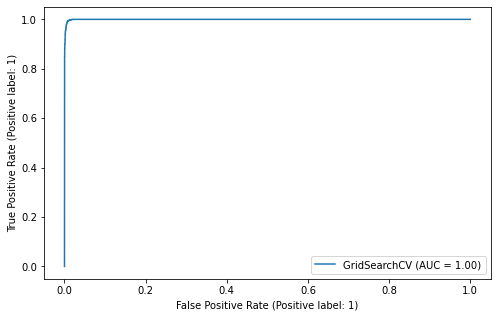

In [92]:
print('Random Forest_f1, Test set:\n')
plot_roc_curve(rf2_grid, X_train, y_train)

In [93]:
print('Random Forest, scoring="f1_macro", Test set:\n')
print(classification_report(y_test, rf2_test_pred))

# rf2_grid model's class 1 precision is slightly weaker than rf_grid and its recall is slightly better

Random Forest, scoring="f1_macro", Test set:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2114
           1       0.68      0.67      0.67       352

    accuracy                           0.91      2466
   macro avg       0.81      0.81      0.81      2466
weighted avg       0.91      0.91      0.91      2466



Random Forest, scoring="f1_macro", Test set:



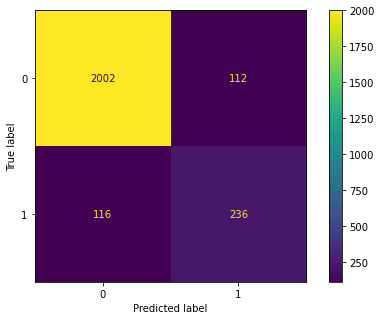

In [94]:
print('Random Forest, scoring="f1_macro", Test set:\n')
plot_confusion_matrix(rf2_grid, X_test, y_test)

Random Forest_f1, Test set:



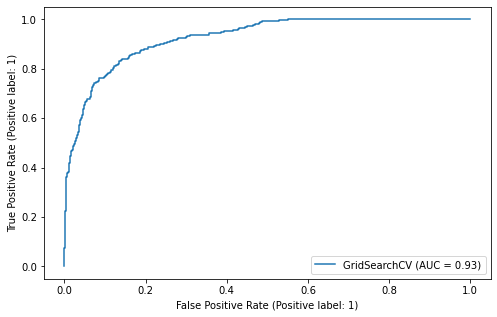

In [95]:
print('Random Forest_f1, Test set:\n')
plot_roc_curve(rf2_grid, X_test, y_test)

In [96]:
y_train_proba_rf_2 = rf2_grid.predict_proba(X_train)
y_test_proba_rf_2 = rf2_grid.predict_proba(X_test)

In [97]:
print('Random Forest f1 Classification, Train set roc_auc:', roc_auc_score(y_train,y_train_proba_rf_2[:,1]))
print('Logistic Regression f1, Test set roc_auc:', roc_auc_score(y_test,y_test_proba_rf_2[:,1]))

Random Forest f1 Classification, Train set roc_auc: 0.9995905547723691
Logistic Regression f1, Test set roc_auc: 0.9255894147243484


### 4.4 Compare the logistic regression and random forest models

In [98]:
#compare the model performance
data = {'Metrics':['Precision', 'Recall', 'f1', 'roc-auc'],
        'Logistic Regression':[0.54, 0.73, 0.62, 0.9],
        'Random Forest_roc':[0.58,0.77,0.66,0.93],
        'Random Forest_f1':[0.68,0.67,0.67,0.93]
        }
df_model_performance = pd.DataFrame(data)
df_model_performance

Metrics  Logistic Regression  Random Forest_roc  Random Forest_f1
0  Precision                 0.54               0.58              0.68
1     Recall                 0.73               0.77              0.67
2         f1                 0.62               0.66              0.67
3    roc-auc                 0.90               0.93              0.93

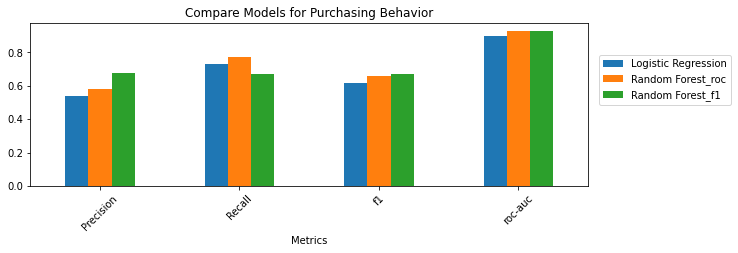

In [99]:
#plot the model performance including accuracy, precision, racall, f1score and auc
models = ['Logistic Regression','Random Forest_roc','Random Forest_f1']
df_model_performance.plot(x='Metrics', y=models, kind='bar', figsize=(10,3))
plt.title('Compare Models for Purchasing Behavior')
plt.legend(loc=(1.02,0.5))
plt.xticks(rotation=45);

#### comparison:

***the logistic regression model has poor class 1 precision (too many FP)***

***Random forest models are much better than logistic regression model***

***Dependson the business plan, if the business is focusing on getting all the customers who purchase, then racall is very important.At this situation, we need Random Forest_roc.***

***If the business is focusing on getting most correct prediction from all the positive prediction.Precision is very important. then we need Random Forest_f1***


### 4.5 Feature Importance

In [100]:
# for this work, I assume the purpose of the work is to find all customers that makes purchase. 
# Use random forest roc for this situation.

rf_final = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=21, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=150, random_state=56)
rf_final.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=21, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=150, random_state=56)

In [101]:
feature_imp = pd.Series(index=X_train.columns, data=rf_final.feature_importances_).sort_values(ascending=False)
feature_imp

PageValues                                                         0.486901
Month                                                              0.104076
ProductRelated                                                     0.096081
BounceRates                                                        0.076663
Administrative_Duration                                            0.051682
Administrative                                                     0.041996
TrafficType                                                        0.028288
Region                                                             0.025051
Informational_Duration                                             0.019271
Informational                                                      0.014701
OperatingSystems                                                   0.011972
Browser                                                            0.011214
['Returning_Visitor', 'New_Visitor', 'Other']_Returning_Visitor    0.008879
['Returning_

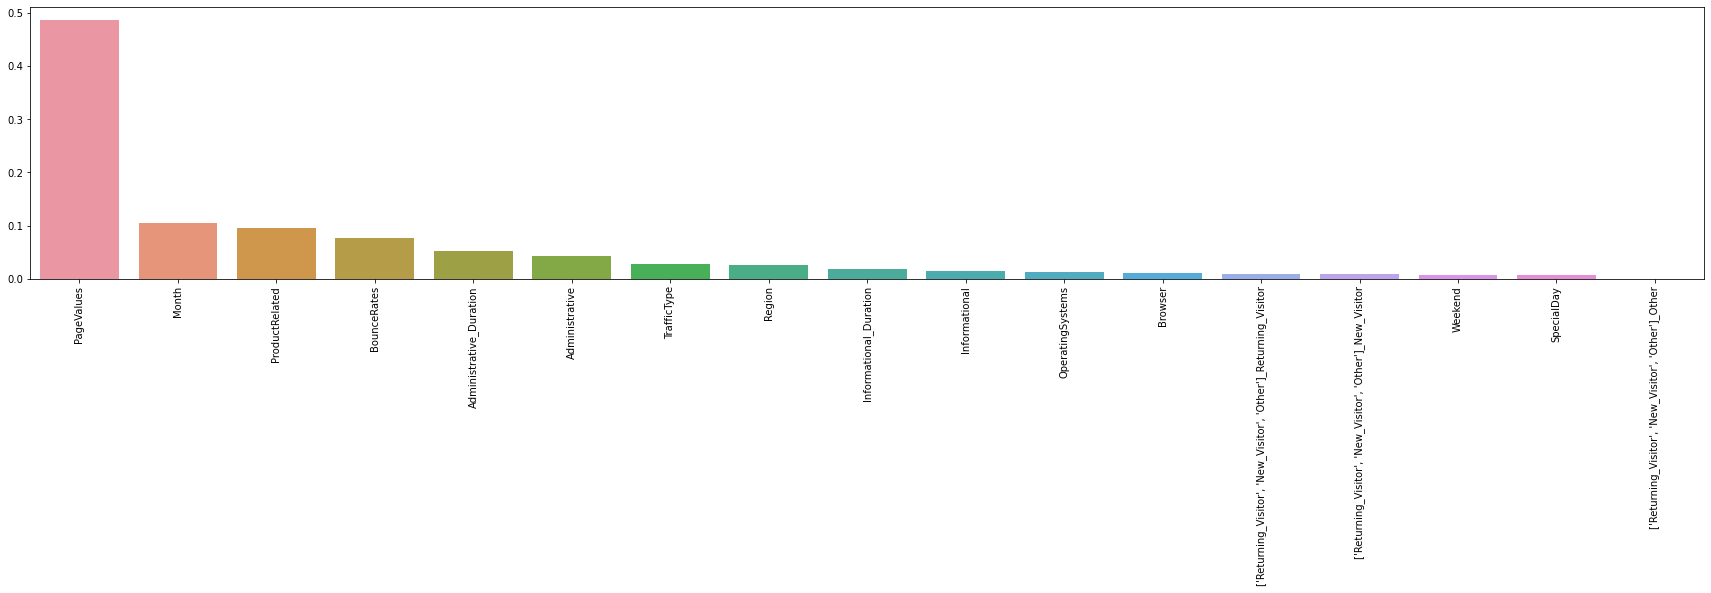

In [102]:
plt.figure(figsize=(30,5))
sns.barplot(x=feature_imp.index, y=feature_imp)
plt.xticks(rotation=90);

In [103]:
#try to tune the threshold for the classification model, we will use Random Forest for this part
results = pd.DataFrame()
results['prob'] = rf_final.predict_proba(X_test)[:,1]    #probability of class 1, test set

thresholds = np.linspace(0.1,0.9,200)
precisions = []
recalls = []
f1s = []
for thresh in thresholds:
    #pred_1 is the predict results of class 1
    results['pred_1'] = 0
    results.loc[results.prob>thresh, 'pred_1'] = 1   
    
    precision = precision_score(y_test, results['pred_1'])
    precisions.append(np.around(precision,3))
    recall = recall_score(y_test, results['pred_1'])
    recalls.append(np.around(recall,3))
    f1 = f1_score(y_test, results['pred_1'])
    f1s.append(np.around(f1,3))

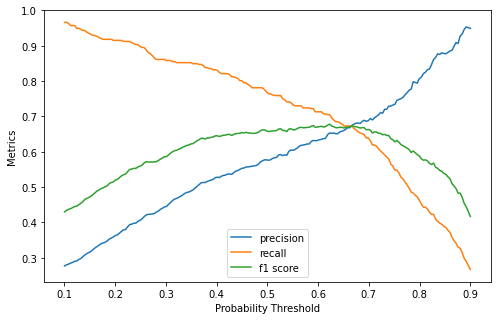

In [104]:
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.plot(thresholds, f1s, label='f1 score')
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.legend(loc='best')

***It really depends on the business to tune the threshold. For example: If the business care about picking out all the purchased customer, recall is important, else, precision is important. For current sityation, I will leave the threshold as it.***


### 4.6 Use shap to explain the contribution of features to individual customers

It's important to show which features (factors) contribute most to the purchase prediction of an individual customer.
"shap" is a useful tool to achieve this goal.

In [105]:
import shap

In [106]:
explainer = shap.TreeExplainer(rf_final)

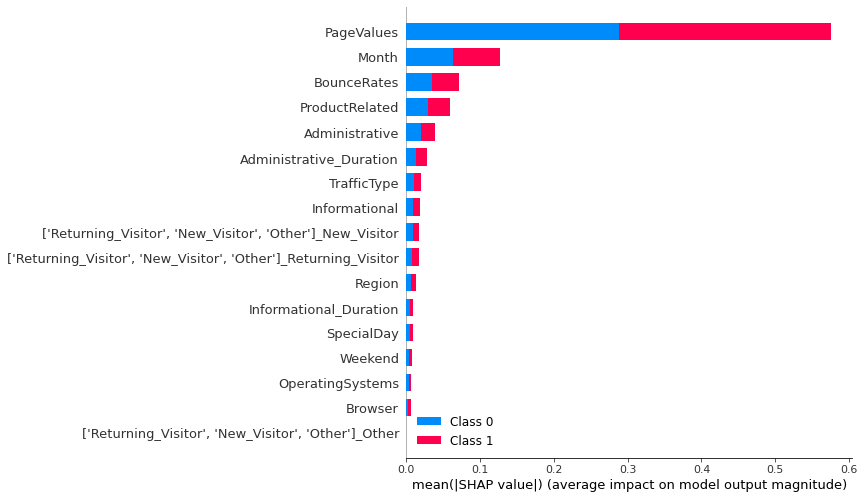

In [107]:
shap_v = explainer.shap_values(X_train)
shap.summary_plot(shap_v, X_train, plot_type='bar')

In [108]:
shap_v
# shap_v contains two lists, the first one is for class 0 and the second is for class 1
# two lists are composed of numbers with opposite +/- signs
# this is because class 0 and class 1 are opposite to each other. 
# a positive factor for class 0 is negative for class 1

[array([[-1.41440757e-03,  2.32374499e-02,  5.36973332e-03, ...,
          6.44057423e-03,  6.70205825e-06,  6.05698099e-03],
        [ 2.08318292e-02,  1.08860051e-02,  8.32296924e-03, ...,
          7.59853627e-03, -9.07888022e-06,  6.86037164e-03],
        [-1.00354696e-02,  8.66450885e-03,  1.82900188e-02, ...,
          4.84973780e-03, -3.85776925e-05,  5.66815177e-03],
        ...,
        [ 2.14007789e-02,  1.45240459e-02,  5.56883722e-03, ...,
          6.31391242e-03, -8.69485121e-06,  8.17233674e-03],
        [ 6.28280681e-03,  3.90390888e-03, -1.01360193e-02, ...,
          3.61828348e-03,  1.93448726e-07,  5.17227481e-03],
        [ 2.40168872e-02,  1.21305999e-02,  7.13177074e-03, ...,
          8.79965946e-03, -9.41896838e-06,  8.41174127e-03]]),
 array([[ 1.41440757e-03, -2.32374499e-02, -5.36973332e-03, ...,
         -6.44057423e-03, -6.70205825e-06, -6.05698099e-03],
        [-2.08318292e-02, -1.08860051e-02, -8.32296924e-03, ...,
         -7.59853627e-03,  9.07888022e

In [109]:
shap_v[0]
# shap values for class 0
# this array is of the same shape as X_train
# so every row of the array is for one customer entry
# inside each row are the shap values for each features

array([[-1.41440757e-03,  2.32374499e-02,  5.36973332e-03, ...,
         6.44057423e-03,  6.70205825e-06,  6.05698099e-03],
       [ 2.08318292e-02,  1.08860051e-02,  8.32296924e-03, ...,
         7.59853627e-03, -9.07888022e-06,  6.86037164e-03],
       [-1.00354696e-02,  8.66450885e-03,  1.82900188e-02, ...,
         4.84973780e-03, -3.85776925e-05,  5.66815177e-03],
       ...,
       [ 2.14007789e-02,  1.45240459e-02,  5.56883722e-03, ...,
         6.31391242e-03, -8.69485121e-06,  8.17233674e-03],
       [ 6.28280681e-03,  3.90390888e-03, -1.01360193e-02, ...,
         3.61828348e-03,  1.93448726e-07,  5.17227481e-03],
       [ 2.40168872e-02,  1.21305999e-02,  7.13177074e-03, ...,
         8.79965946e-03, -9.41896838e-06,  8.41174127e-03]])

In [110]:
explainer.expected_value
# expected_value is the middle of two possible classes. Maybe related to the threshold?
# it's the "base value" in the force_plot

array([0.50053543, 0.49946457])

In [111]:
def shap_plot(model, customer):
    explainer = shap.TreeExplainer(model)
    shap_v_customer = explainer.shap_values(customer)
    p=shap.force_plot(explainer.expected_value[1],shap_v_customer[1],customer,matplotlib=True,show=False)
    # Note: in order to save force_plot, must set matplotlib=True and show=False
    # However this code (third line) doesn't work in API. 
    # To make force_plot show in the front end web, follow the method 3 in:
    # https://towardsdatascience.com/tutorial-on-displaying-shap-force-plots-in-python-html-4883aeb0ee7c
    
    return p

f(x) value is the predicted purchasing probability of the customer, ranging from 0.0-1.0
For example, with f(x) 0.10, the customer is predicted to have a purchasing probability of 10%
Red blocks are factors leading to a higher purchasing probability
Blue blocks are factors leading to a lower purchasing probability
A bigger block poses a higher influence on purchasing probability


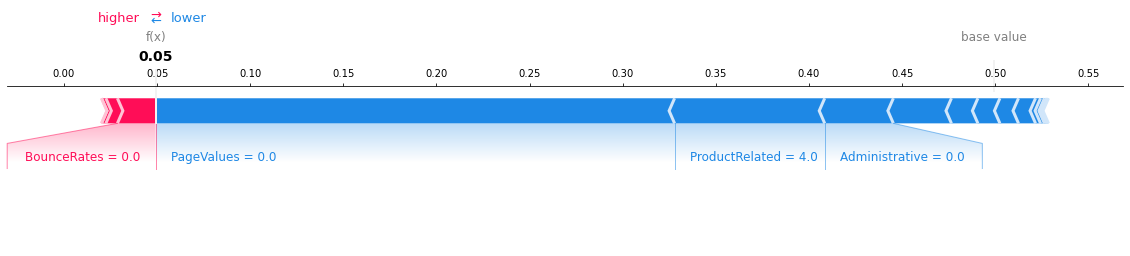

In [112]:
shap_plot(rf_final, X_train.iloc[1012])
plt.savefig('customer_purchase_probability.png', bbox_inches='tight', dpi=100)
print('f(x) value is the predicted purchasing probability of the customer, ranging from 0.0-1.0')
print('For example, with f(x) 0.10, the customer is predicted to have a purchasing probability of 10%')
print('Red blocks are factors leading to a higher purchasing probability')
print('Blue blocks are factors leading to a lower purchasing probability')
print('A bigger block poses a higher influence on purchasing probability')

In [113]:
rf_final.predict_proba(X_train.iloc[[1012]])

array([[0.95077475, 0.04922525]])

## 5. Generate deployment model and deploy to a web app

### 5.1 Generate the final model for deployment using ALL data rows

In [114]:
X_dpl = X.copy()
X_dpl.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       '['Returning_Visitor', 'New_Visitor', 'Other']_New_Visitor',
       '['Returning_Visitor', 'New_Visitor', 'Other']_Other',
       '['Returning_Visitor', 'New_Visitor', 'Other']_Returning_Visitor'],
      dtype='object')

In [115]:
X_dpl

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
0         0.200000   0.200000    0.000000         0.0      1   
1         0.000000   0.100000    0.000000         0.0      1   
2         0.200000   0.200000    0.000000         0.0      1   
3         0.050000   0.140000    0.000000         0.0      1   
4         0.020000   0.050000    0.000000         0.0      1   
...            ...        ...         ...         ...    ...   
12325     0.007143   0.029031   12.241717         0.0     11   
12326     0.000000   0.021333    0.000000         0.0     10   
12327     0.083333   0.086667    0.000000         0.0     10   
12328     0.000000   0.021053    0.000000         0.0     10   
12329     0.000000   0.066667    0.000000         0.0     10   

       OperatingSystems  Browser  Region  TrafficType  Weekend  \
0                     1        1       1            1        0   
1                     2        2       1            2        0   
2                     4        1       9            3        0   
3                     3        2       2            4        0   
4                     3        3       1            4        1   
...                 ...      ...     ...          ...      ...   
12325                 4        6       1            1        1   
12326                 3        2       1            8        1   
12327                 3        2       1           13        1   
12328                 2        2       3           11        0   
12329                 3        2       1            2        1   

       ['Returning_Visitor', 'New_Visitor', 'Other']_New_Visitor  \
0                                                      0           
1                                                      0           
2                                                      0           
3                                                      0           
4                                                      0           
...                                                  ...           
12325                                                  0           
12326                                                  0           
12327                                                  0           
12328                                                  0           
12329                      

In [116]:
y_dpl = y

In [117]:
final_model = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=21, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=150, random_state=56)

final_model.fit(X_dpl,y_dpl)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=21, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=150, random_state=56)

In [118]:
pred = final_model.predict(X_dpl)

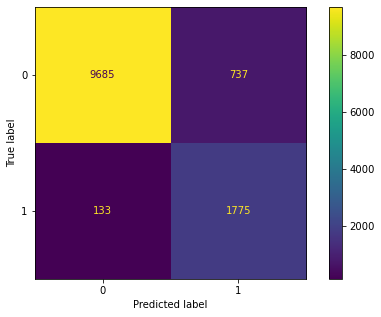

In [119]:
print(plot_confusion_matrix(final_model, X_dpl, y_dpl))

### 5.2 Save the final model to local drive

In [120]:
import joblib

In [121]:
joblib.dump(final_model, 'Purchasing_model.pkl')

['Purchasing_model.pkl']

In [122]:
loadModel = joblib.load('Purchasing_model.pkl')

In [123]:
loadModel.predict_proba(X_dpl.iloc[[1111]])

array([[0.99012773, 0.00987227]])

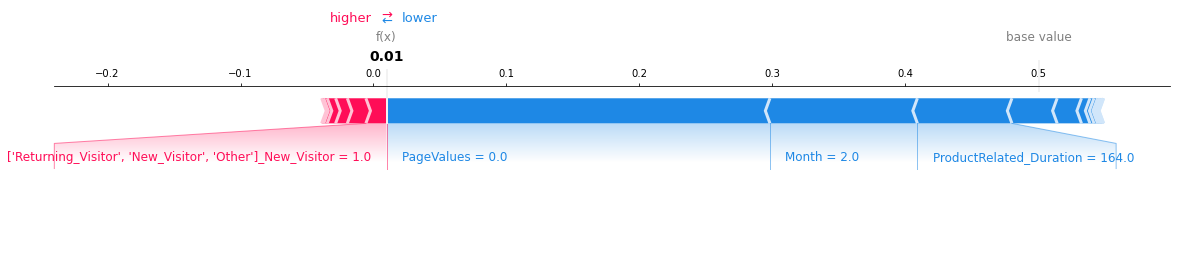

In [124]:
shap_plot(loadModel, X_dpl.iloc[1111])
plt.savefig('customer_purchase_probability.png', bbox_inches='tight', dpi=600)

## 6 Conclusions:

1. EDA has been conducted. Several numerical features show separation of purchase/not purchase customers. Business insights are suggested in Section 

2. Categorical features such as month was found benifical to the model as expected. Page Values were found to be important for the customer purchasing actions. It make sense because page value means more chance that visit has generatesome actural values to the business. Meaning the customers might purchase something on that website.

3. The final model is a Random Forest model optimized by roc_auc scorer. 
The metrics: precision 0.580, recall 0.770, f1-score 0.660, roc_auc 0.93. It really depends on the business to set the threshold and choose the final model.

4.If they care about the recall, which means they want to pick out all the customer who purchase, that will sacrifise the precision. To get that, we can reduce the threshold.


## 7. add a new function to batch output customers based on purchasing probability

In [125]:
df_batch = pd.read_csv('coding_round_data.csv')

In [126]:
df_batch.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [127]:
df_batch['Weekend']=df_batch['Weekend'].astype(np.int)
df_batch['Revenue']=df_batch['Revenue'].astype(np.int)

In [128]:
df_batch = ordinal_encode(df_batch, 'Month', month_ordering)

In [129]:
df_batch = onehot_encode(df_batch, 'VisitorType', visitor_prefix)

In [130]:
df_batch.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      1                 1   
1         0.00       0.10         0.0         0.0      1                 2   
2         0.20       0.20         0.0         0.0      1                 4   
3         0.05       0.14         0.0         0.0      1                 3   
4         0.02       0.05         0.0         0.0      1                 3   

   Browser  Region  TrafficType  Weekend  Revenue  \
0        1       1            1        0        0   
1        2       1            2        0        0   
2        1       9            3        0        0   
3        2       2            4        0        0   
4        3       1            4        1        0   

   ['Returning_Visitor', 'New_Visitor', 'Other']_New_Visitor  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           

   ['Returning_Visitor', 'New_Visitor', 'Other']_Other  \
0                                                  0     
1                                                  0     
2                                                  0     
3                                                  0     
4                                                  0     

   ['Returning_Visitor', 'New_Visitor', 'Other']_Returning_Visitor  
0                                                  1                
1                                                  1                
2                                                  1                
3                                                  1                
4                                                  1

In [137]:
features = list(df_batch.columns)
features.remove('Revenue')
features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 "['Returning_Visitor', 'New_Visitor', 'Other']_New_Visitor",
 "['Returning_Visitor', 'New_Visitor', 'Other']_Other",
 "['Returning_Visitor', 'New_Visitor', 'Other']_Returning_Visitor"]

In [134]:
loadModel = joblib.load('Purchasing_model.pkl')

In [135]:
purchase_prob = loadModel.predict_proba(df_batch.iloc[10120:][features])
purchase_prob[:,1]

array([0.09763671, 0.19656595, 0.80699763, ..., 0.04781744, 0.10460879,
       0.16201817])

In [139]:
def customer_purchase_prob(customers, model, probability):
    '''
    # this function takes in info of multiple customers and a pre-defined probability of purchasing, 
    #     and return the customer IDs with purchasing probability >= the pre-defined probability
    '''
    features = ['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend',
 "['Returning_Visitor', 'New_Visitor', 'Other']_New_Visitor",
 "['Returning_Visitor', 'New_Visitor', 'Other']_Other",
 "['Returning_Visitor', 'New_Visitor', 'Other']_Returning_Visitor"]
    
    purchase_prob = model.predict_proba(customers[features])
    prob = pd.Series(purchase_prob[:,1], name='purchase_prob')
    
    res = pd.DataFrame()
    res['Churn_Probability'] = prob.values
    
    return res[res['Churn_Probability']>= probability]

In [141]:
customer_purchase_prob(df_batch, loadModel, 0.8)

Churn_Probability
65              0.858148
101             0.868421
196             0.894564
198             0.985428
199             0.898652
...                  ...
12267           0.934000
12272           0.903922
12276           0.957926
12312           0.855310
12313           0.843429

[1258 rows x 1 columns]

## this function customer_purchase_prob() is able to batch output customers based on their purchase probability